In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/Adrian/Desktop/A2 Modelagem/train.csv")

df.columns = ['ID', 'pontuacao1', 'pontuacao2',
                 'pontuacao3', 'pontuacao4',
                 'pontuacao5', 'pontuacao6',
                 'pontuacao7', 'pontuacao8',
                 'pontuacao9', 'pontuacao10',
                 'idade', 'genero',
                 'etnia', 'icteria',
                 'familia', 'país',
                 'triagem_antes', 'pontuação_teste',
                 'idade_desc', 'relação',
                 'autismo']



df.drop("ID", axis=1, inplace=True)
df.drop('idade_desc', axis=1, inplace=True)
# df.drop("ethnicity", axis=1, inplace=True)
# df.drop("contry_of_res", axis=1, inplace=True)
# df.drop("age_desc", axis=1, inplace=True)
# df.drop("relation", axis=1, inplace=True)

df['genero'] = df['genero'].apply(lambda x: 0 if x == 'm' else 1)
df['icteria'] = df['icteria'].apply(lambda x: 0 if x == 'no' else 1)
df['familia'] = df['familia'].apply(lambda x: 0 if x == 'no' else 1)
df['triagem_antes'] = df['triagem_antes'].apply(lambda x: 0 if x == 'no' else 1)
df = df.dropna()

label_encoder = LabelEncoder()
label_encoder_etinia = LabelEncoder()
label_encoder_lugar = LabelEncoder()
label_encoder_realation = LabelEncoder()


df.iloc[:,12]= label_encoder_etinia.fit_transform(df.iloc[:,12]) #Etinia
df.iloc[:,15] = label_encoder_lugar.fit_transform(df.iloc[:,15]) # Counry. Tranfomar essas colunas em fator, já que não estão e números
df.iloc[:,18] = label_encoder_realation.fit_transform(df.iloc[:,18]) 



df.columns

Index(['pontuacao1', 'pontuacao2', 'pontuacao3', 'pontuacao4', 'pontuacao5',
       'pontuacao6', 'pontuacao7', 'pontuacao8', 'pontuacao9', 'pontuacao10',
       'idade', 'genero', 'etnia', 'icteria', 'familia', 'país',
       'triagem_antes', 'pontuação_teste', 'relação', 'autismo'],
      dtype='object')

### 1. Histogramas ou Gráficos de Densidade
Para visualizar a distribuição das pontuações AQ (A1_Score a A10_Score) e da idade dos pacientes (age).

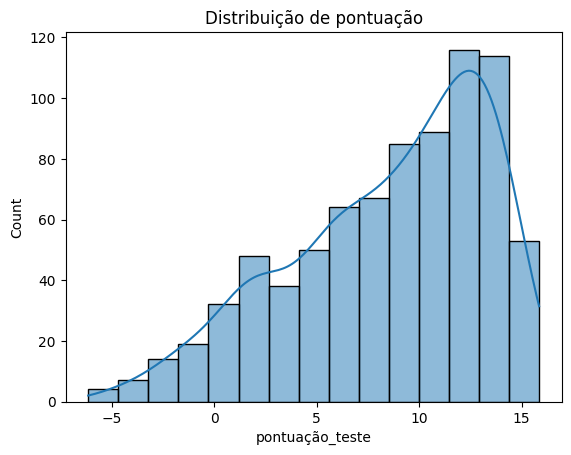

In [3]:
# Histograma de idades
sns.histplot(data=df, x='pontuação_teste', kde=True)
plt.title('Distribuição de pontuação')
plt.show()

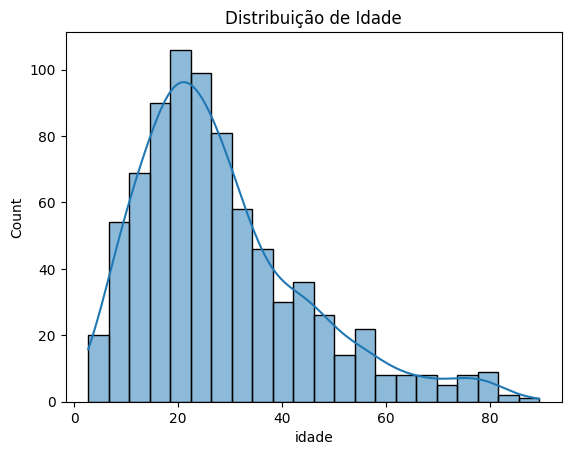

In [4]:
# Histograma de idades
sns.histplot(data=df, x='idade', kde=True)
plt.title('Distribuição de Idade')
plt.show()



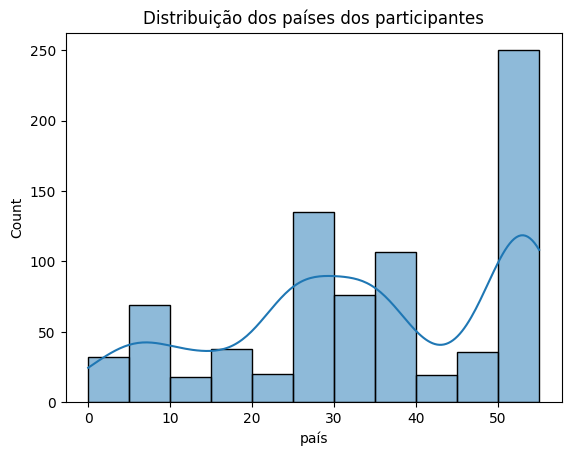

In [5]:
# Histograma de idades
sns.histplot(data=df, x='país', kde=True)
plt.title('Distribuição dos países dos participantes')
plt.show()


### 2. Gráficos de Barras para Variáveis Categóricas
Para visualizar a frequência de categorias como gender, ethnicity, jaundice, autism, e country_of_res.

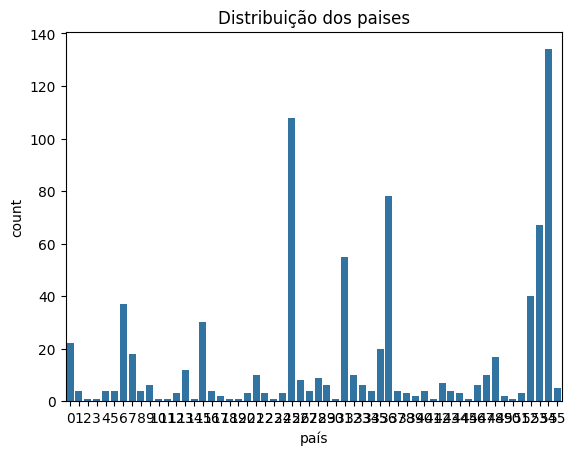

In [6]:
sns.countplot(x='país', data=df)
plt.title('Distribuição dos paises')
plt.show()

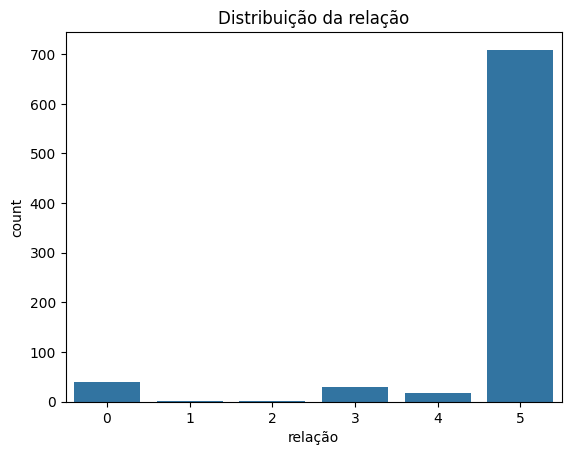

In [7]:
sns.countplot(x='relação', data=df)
plt.title('Distribuição da relação')
plt.show()

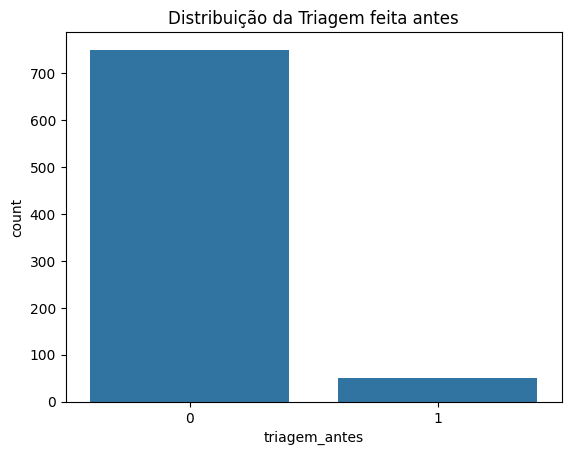

In [8]:
sns.countplot(x='triagem_antes', data=df)
plt.title('Distribuição da Triagem feita antes')
plt.show()

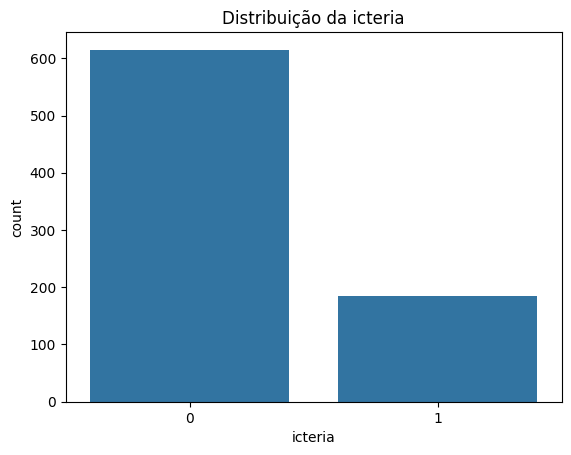

In [9]:
sns.countplot(x='icteria', data=df)
plt.title('Distribuição da icteria')
plt.show()

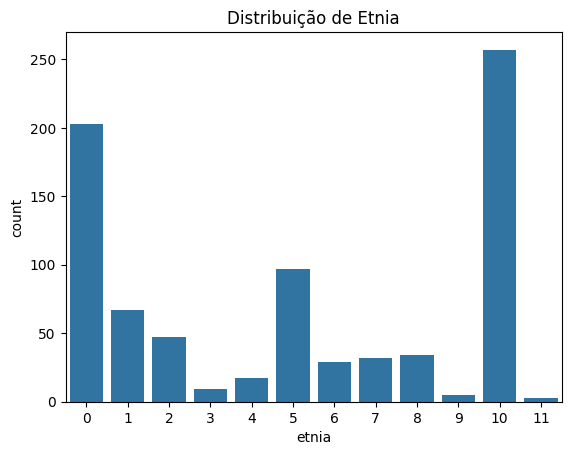

In [10]:
sns.countplot(x='etnia', data=df)
plt.title('Distribuição de Etnia')
plt.show()

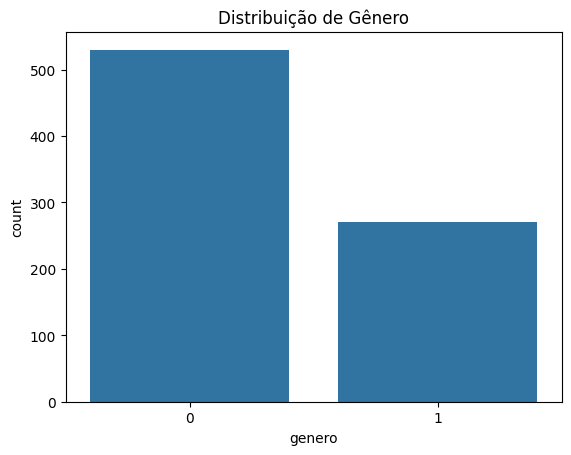

In [11]:
# Gráfico de barras para gênero
sns.countplot(x='genero', data=df)
plt.title('Distribuição de Gênero')
plt.show()



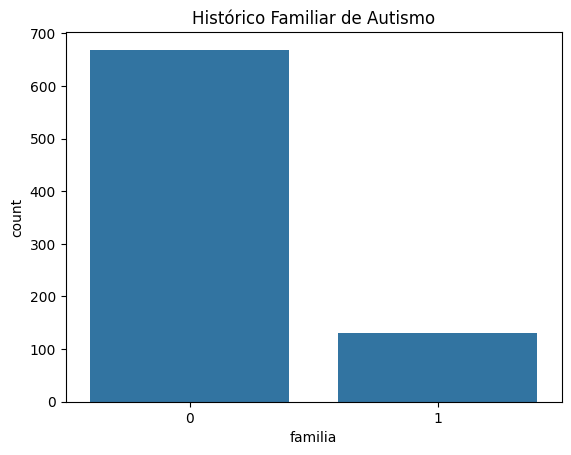

In [12]:
# Gráfico de barras para o diagnóstico de autismo na família
sns.countplot(x='familia', data=df)
plt.title('Histórico Familiar de Autismo')
plt.show()

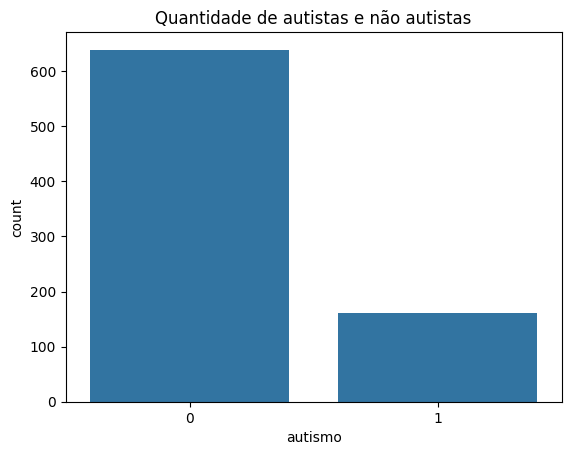

In [13]:
# Gráfico de barras para o diagnóstico de autismo na família
sns.countplot(x='autismo', data=df)
plt.title('Quantidade de autistas e não autistas')
plt.show()

### 4. Gráficos de Violino
Esses gráficos são úteis para visualizar a distribuição de variáveis contínuas em relação às categóricas.

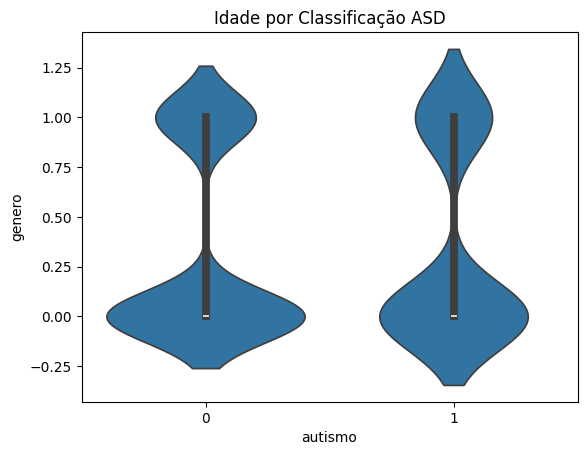

In [14]:
# Gráfico de violino para idade por resultado ASD
sns.violinplot(x='autismo', y='genero', data=df)
plt.title('Idade por Classificação ASD')
plt.show()


### 5. Heatmap para Correlações
Um heatmap das correlações entre as pontuações AQ pode ajudar a entender como as diferentes questões estão interrelacionadas.

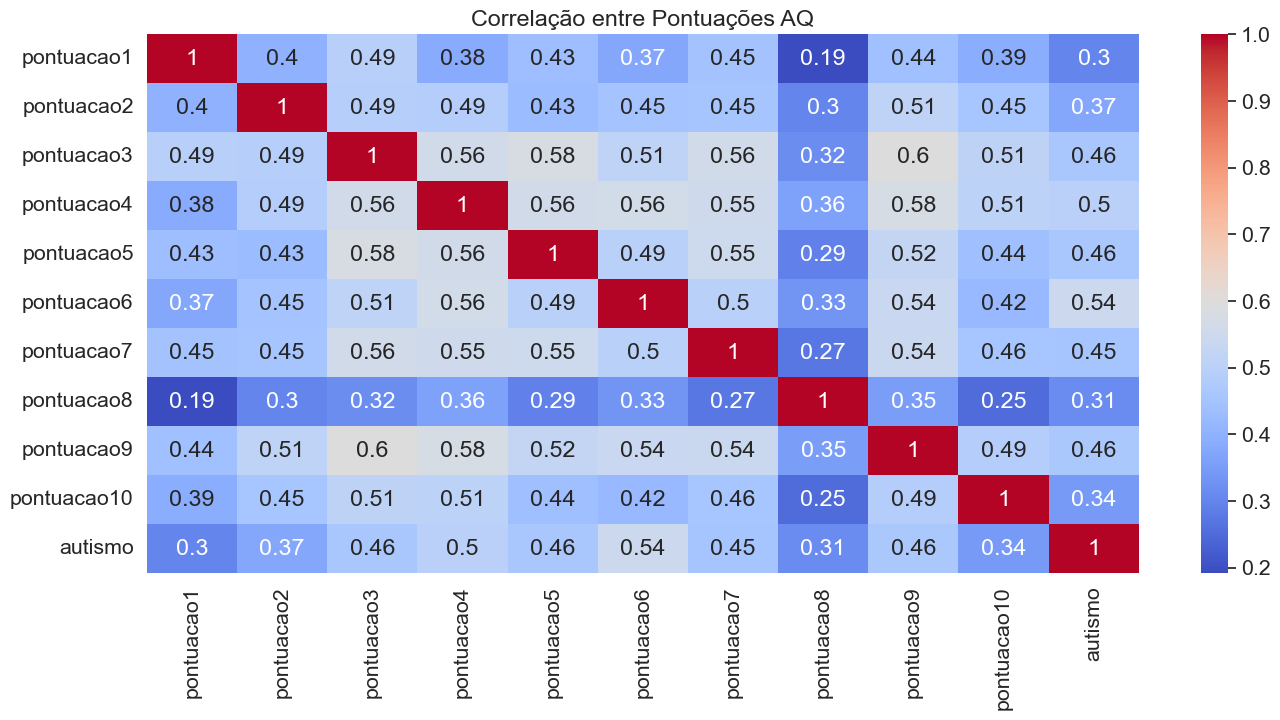

In [15]:
# Correlação apenas entre os scores AQ
aq_scores = df.loc[:, ['pontuacao1', 'pontuacao2', 'pontuacao3', 'pontuacao4', 'pontuacao5', 'pontuacao6', 'pontuacao7', 'pontuacao8', 'pontuacao9', 'pontuacao10', 'autismo']]

corr = aq_scores.corr()

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Pontuações AQ')
plt.show()

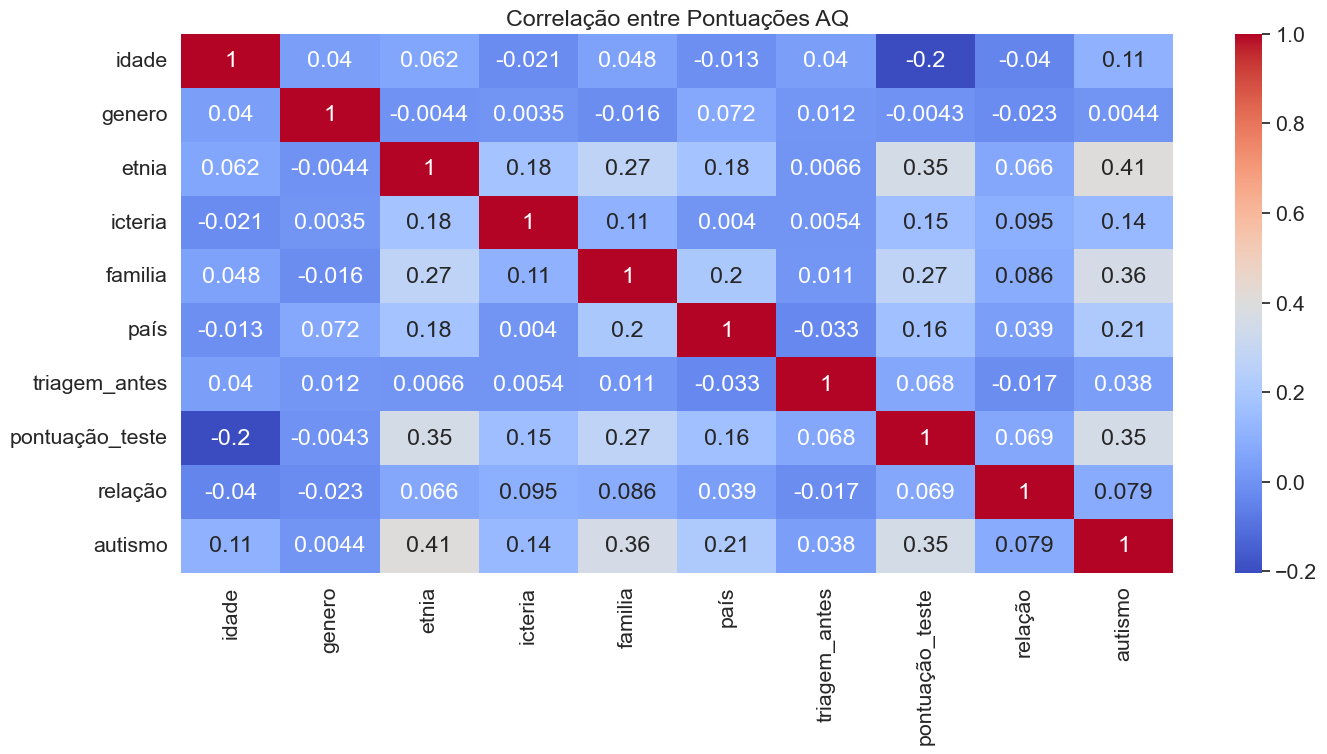

In [16]:
# Correlação apenas entre os scores AQ
aq_scores = df.loc[:, 'idade':'autismo']
corr = aq_scores.corr()

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Pontuações AQ')
plt.show()

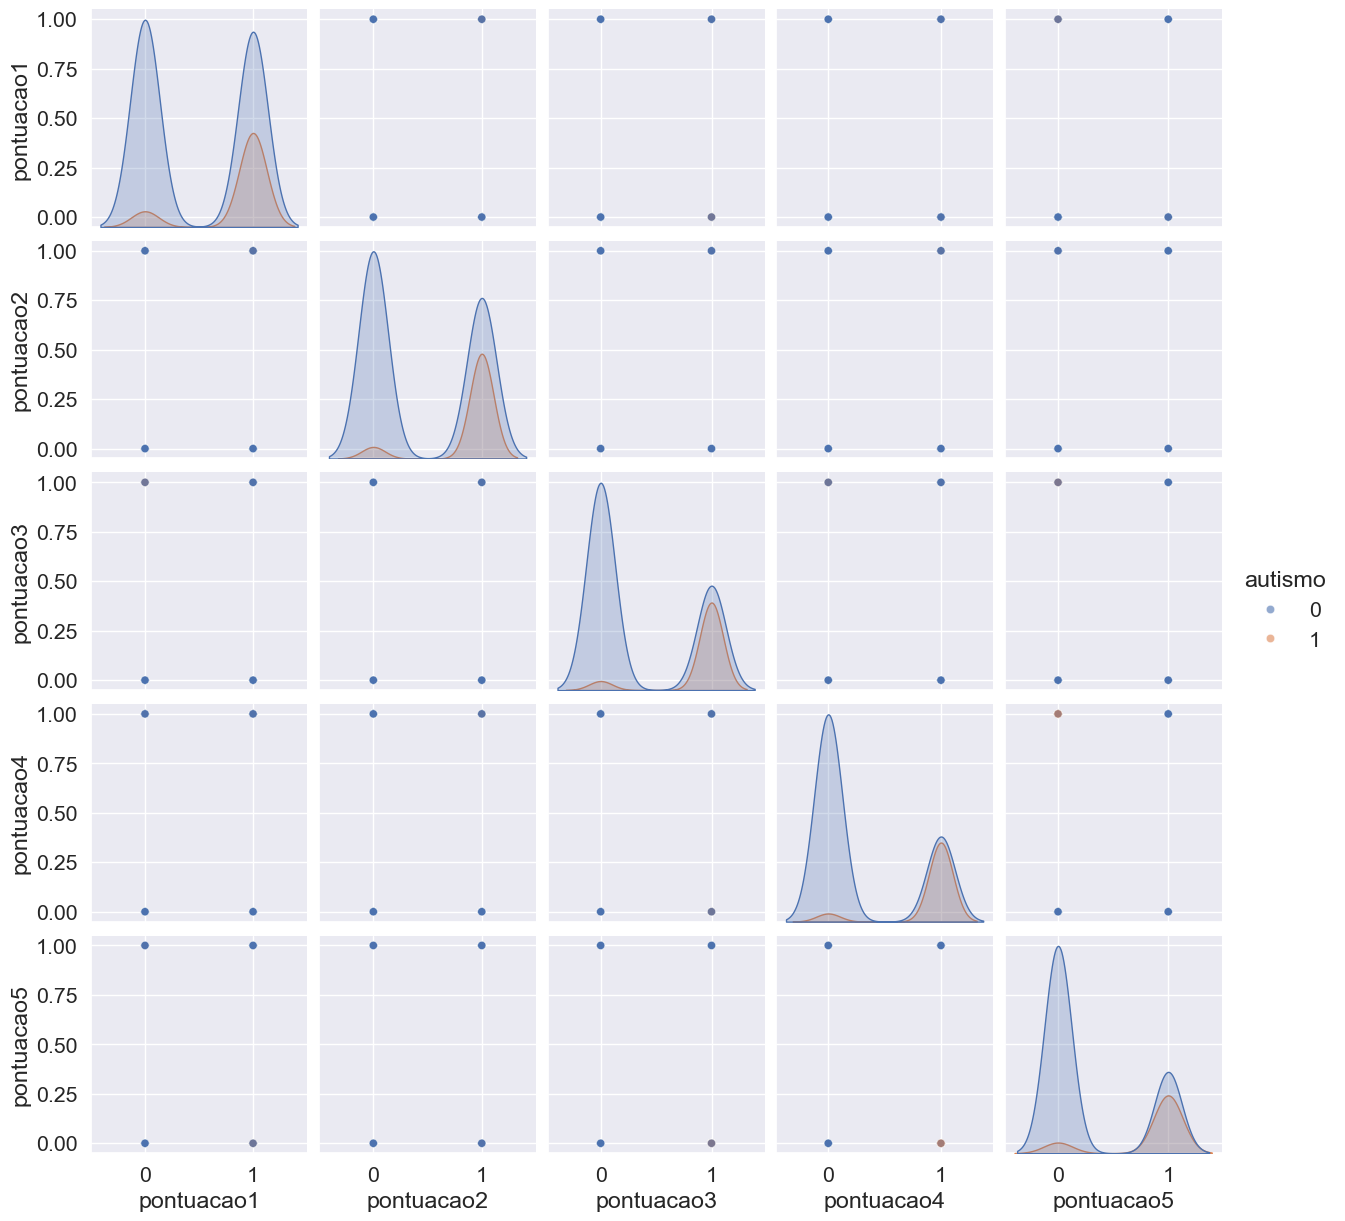

In [17]:
# Criar o primeiro pairplot com o primeiro grupo de colunas
pair_plot1 = sns.pairplot(df[['pontuacao1', 'pontuacao2', 'pontuacao3', 'pontuacao4', 'pontuacao5', 'autismo']], hue="autismo", diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()  # Mostrar o primeiro gráfico


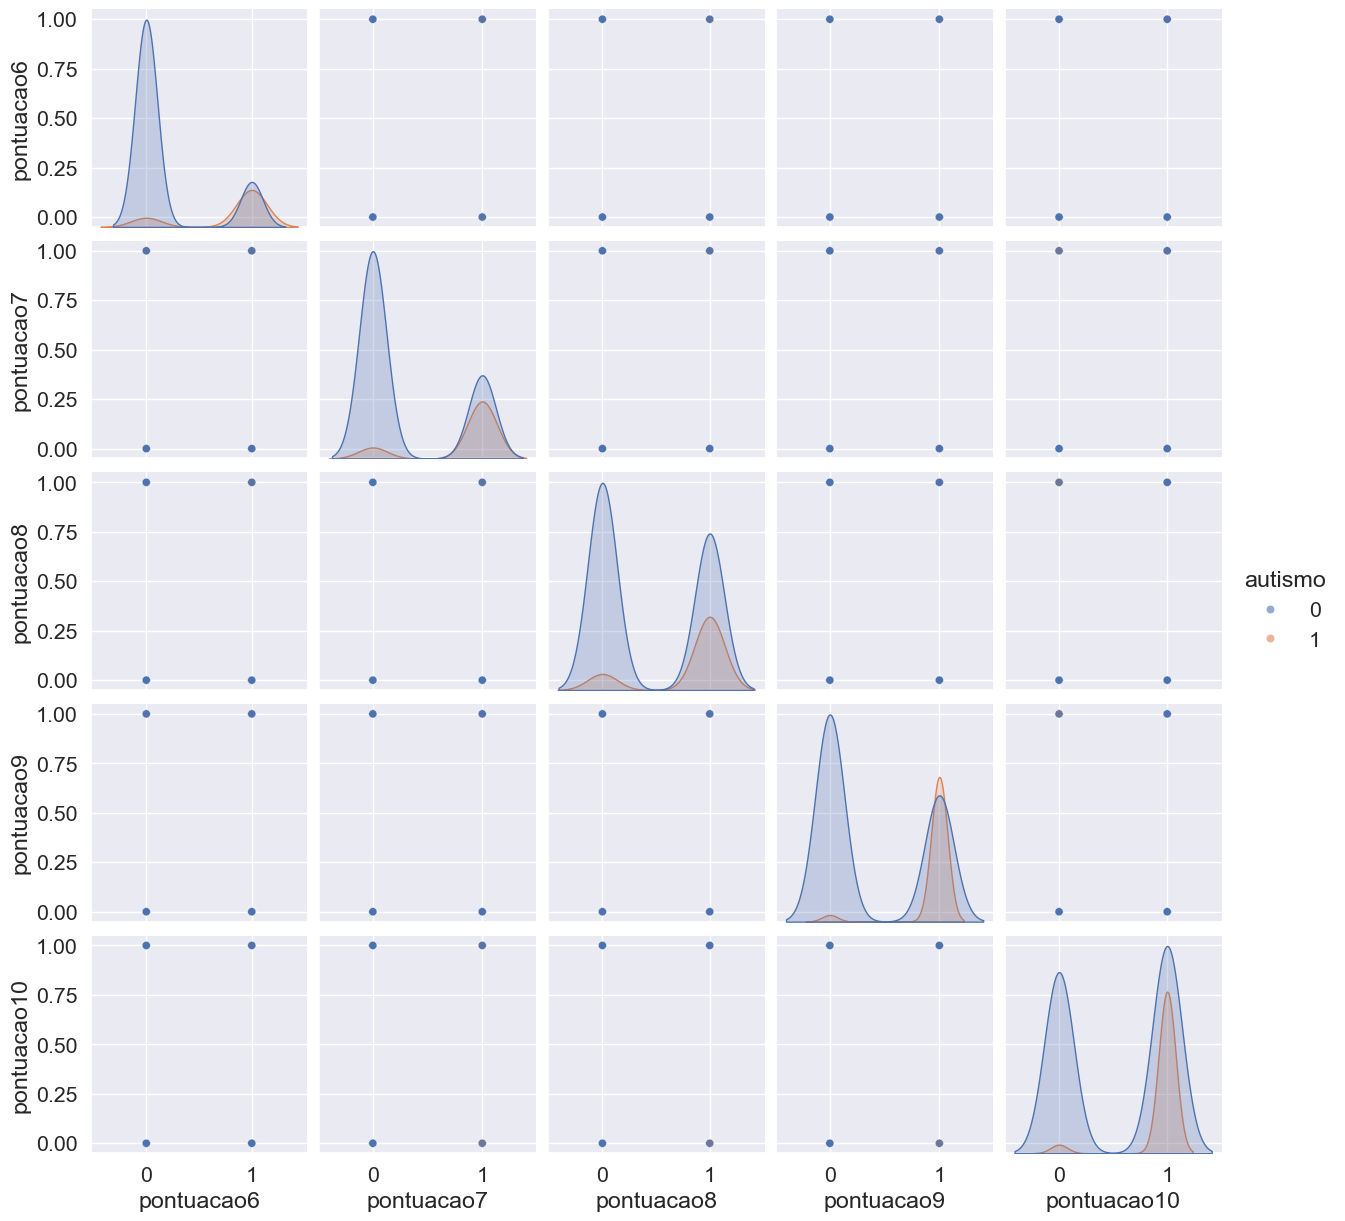

In [18]:
# Dividir as colunas do DataFrame em dois grupos
colunas_grupo1 = ['coluna1', 'coluna2', 'coluna3']  # Substitua pelos nomes reais das suas colunas
colunas_grupo2 = ['coluna4', 'coluna5', 'coluna6']  # Substitua pelos nomes reais das suas colunas

# Criar o primeiro pairplot com o primeiro grupo de colunas
pair_plot1 = sns.pairplot(df[['pontuacao6', 'pontuacao7', 'pontuacao8', 'pontuacao9', 'pontuacao10', 'autismo']], hue="autismo", diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()  # Mostrar o primeiro gráfico



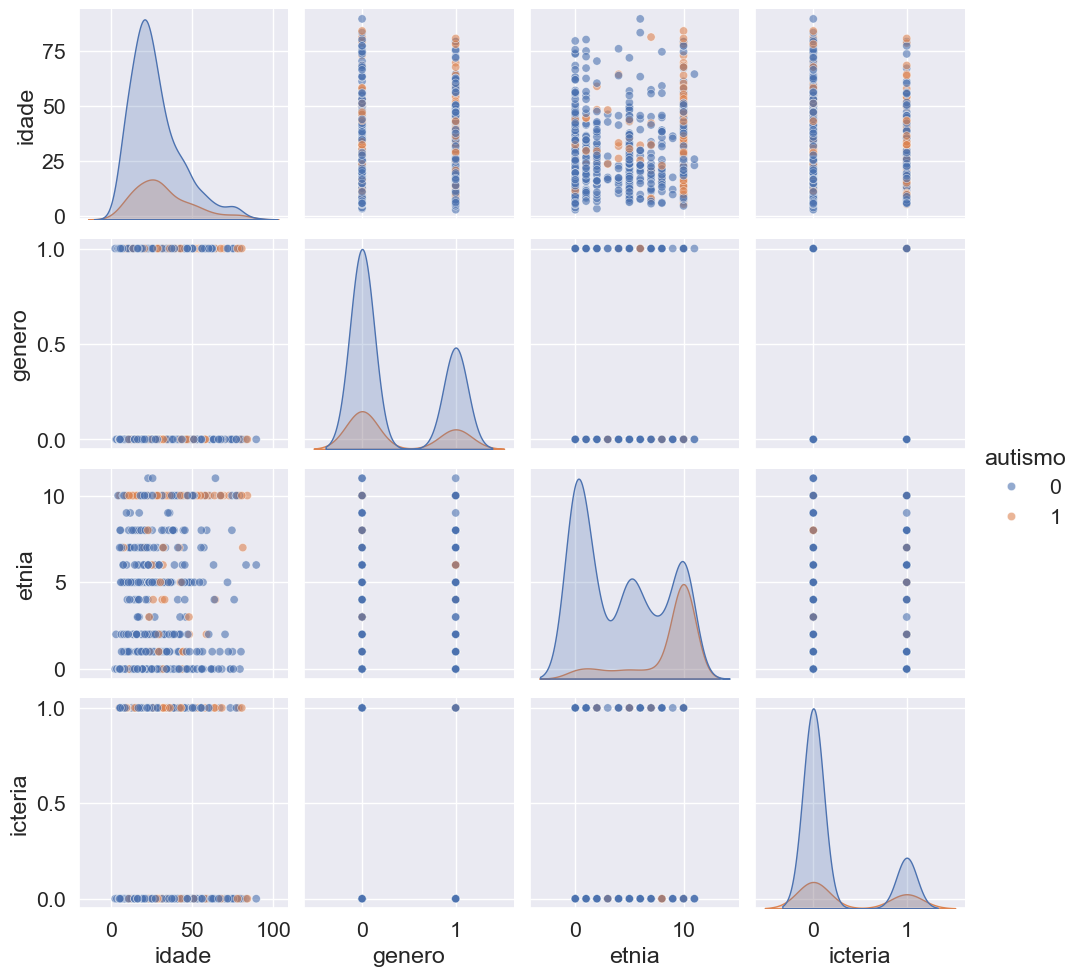

In [20]:
#Criar o segundo pairplot com o segundo grupo de colunas
pair_plot2 = sns.pairplot(df[['idade', 'genero','etnia', 'icteria','autismo']], hue="autismo", diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()  # Mostrar o segundo gráficos

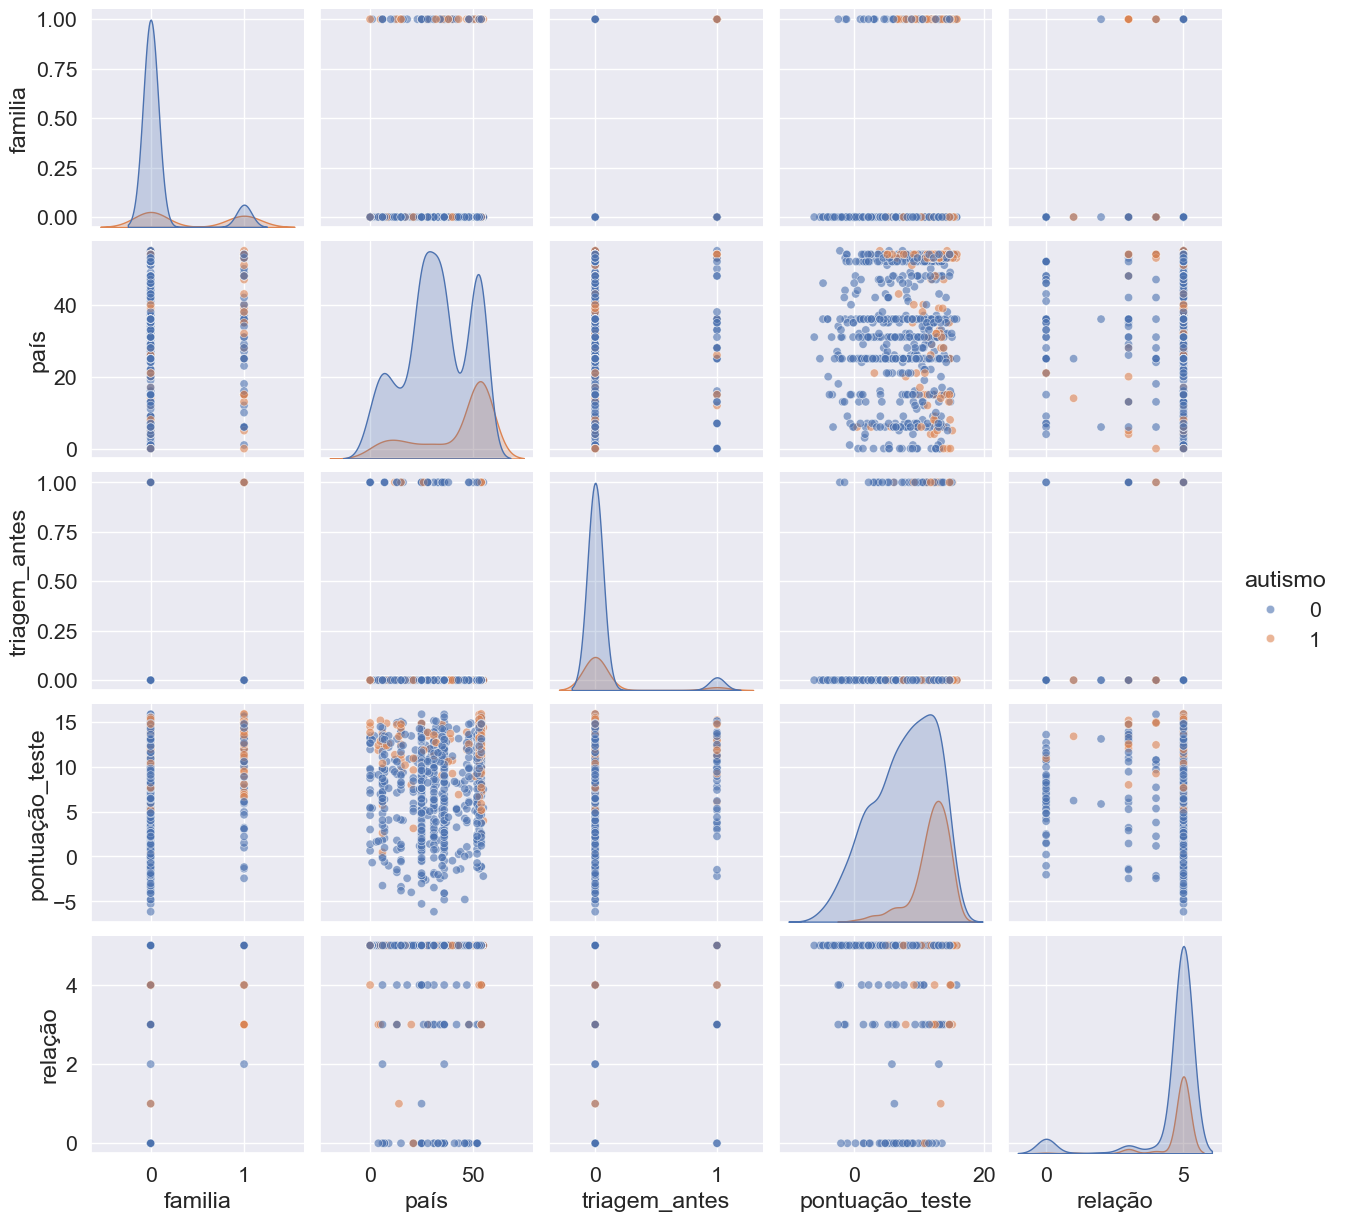

In [21]:
#Criar o segundo pairplot com o segundo grupo de colunas
pair_plot2 = sns.pairplot(df[['familia', 'país','triagem_antes', 'pontuação_teste', 'relação','autismo']], hue="autismo", diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()  # Mostrar o segundo gráficos